# **Data Validation**

In [4]:
# importing libraries

import pandas as pd
import numpy as np

#importing the data
file_path=r"erased"
df = pd.read_csv(file_path)

# checking if the data was loaded to the environment

print(df.shape)
print(df.head())
print(df.info())
print(df.describe(include='all'))

# Initial check

# week column
print("WEEK COLUMN")
print(df['week'].describe())
print("Unique weeks:", df['week'].unique())
print("Nulls in week:", df['week'].isnull().sum())
print()

# sales_method column
print("SALES_METHOD COLUMN")
print(df['sales_method'].unique())
print(df['sales_method'].value_counts())
print("Nulls in sales_method:", df['sales_method'].isnull().sum())
print()

# customer_id column
print("CUSTOMER_ID COLUMN")
print("Number of unique customer_id:", df['customer_id'].nunique())
print("Number of total rows:", len(df))
print("Duplicates in customer_id:", df['customer_id'].duplicated().sum())
print("Nulls in customer_id:", df['customer_id'].isnull().sum())
print()

# nb_sold column
print("NB_SOLD COLUMN")
print(df['nb_sold'].describe())
print("Nulls in nb_sold:", df['nb_sold'].isnull().sum())
print("Any negative nb_sold:", (df['nb_sold'] < 0).sum())
print()

# revenue column
print("REVENUE COLUMN")
print(df['revenue'].describe())
print("Nulls in revenue:", df['revenue'].isnull().sum())
print("Any negative revenue:", (df['revenue'] < 0).sum())
print()

# years_as_customer column
print("YEARS_AS_CUSTOMER COLUMN")
print(df['years_as_customer'].describe())
print("Nulls in years_as_customer:", df['years_as_customer'].isnull().sum())
print("Any negative years:", (df['years_as_customer'] < 0).sum())
print("Any implausible years (over 2025-1984):", (df['years_as_customer'] > 41).sum())
print()

# nb_site_visits column
print("NB_SITE_VISITS COLUMN")
print(df['nb_site_visits'].describe())
print("Nulls in nb_site_visits:", df['nb_site_visits'].isnull().sum())
print("Any negative nb_site_visits:", (df['nb_site_visits'] < 0).sum())
print()

# state column
print("STATE COLUMN")
print(df['state'].unique())
print(df['state'].value_counts())
print("Nulls in state:", df['state'].isnull().sum())
print()

(15000, 8)
   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  ----- 

In [5]:
# Data cleaning

# Fixing typos in sales_method column
df['sales_method'] = df['sales_method'].replace({
    'em + call': 'Email + Call',
    'email': 'Email'
})

# Confirming values after cleaning
print("Sales methods after cleaning:", df['sales_method'].unique())

# Remove rows with impossible 'years_as_customer' values (> 41 years)
df = df[df['years_as_customer'] <= 41]

# Optional: confirm no implausible years left
print("Max years_as_customer after cleaning:", df['years_as_customer'].max())

# Prepare a version of the data with non-missing revenue for analyses involving revenue
df_revenue = df[df['revenue'].notnull()].copy()

# Check number of rows after removing missing revenue
print("Rows with non-missing revenue:", df_revenue.shape[0])

# Checking the data frame after cleaning:
print(df.shape)
print(df.info())
print(df.dtypes)

Sales methods after cleaning: ['Email' 'Email + Call' 'Call']
Max years_as_customer after cleaning: 39
Rows with non-missing revenue: 13924
(14998, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  object 
 2   customer_id        14998 non-null  object 
 3   nb_sold            14998 non-null  int64  
 4   revenue            13924 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB
None
week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         in

# **Exploratory Data Analysis**

Summary statistics for numeric columns:
              week       nb_sold       revenue  years_as_customer  \
count  14998.00000  14998.000000  13924.000000       14998.000000   
mean       3.09828     10.084678     93.937828           4.959261   
std        1.65649      1.812334     47.437281           5.011237   
min        1.00000      7.000000     32.540000           0.000000   
25%        2.00000      9.000000     52.470000           1.000000   
50%        3.00000     10.000000     89.500000           3.000000   
75%        5.00000     11.000000    107.330000           7.000000   
max        6.00000     16.000000    238.320000          39.000000   

       nb_site_visits  
count    14998.000000  
mean        24.990799  
std          3.501100  
min         12.000000  
25%         23.000000  
50%         25.000000  
75%         27.000000  
max         41.000000  

Sales method value counts:
sales_method
Email           7465
Call            4961
Email + Call    2572
Name: count, dtype

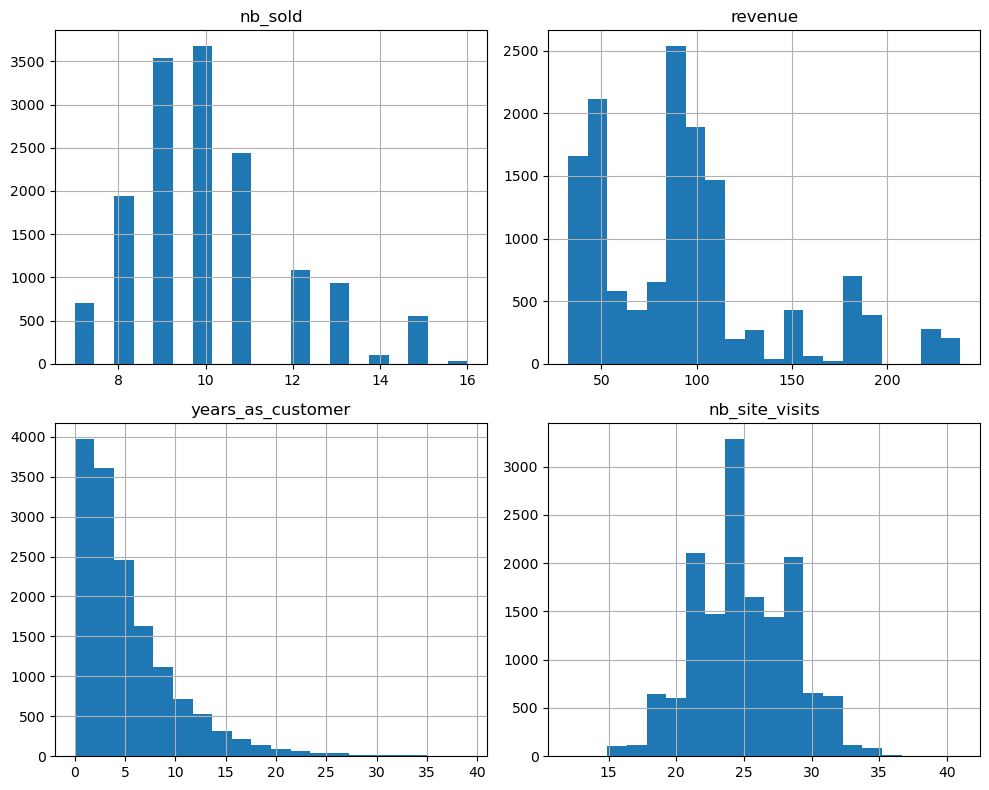

Pairplot for numeric columns (excluding missing revenue):


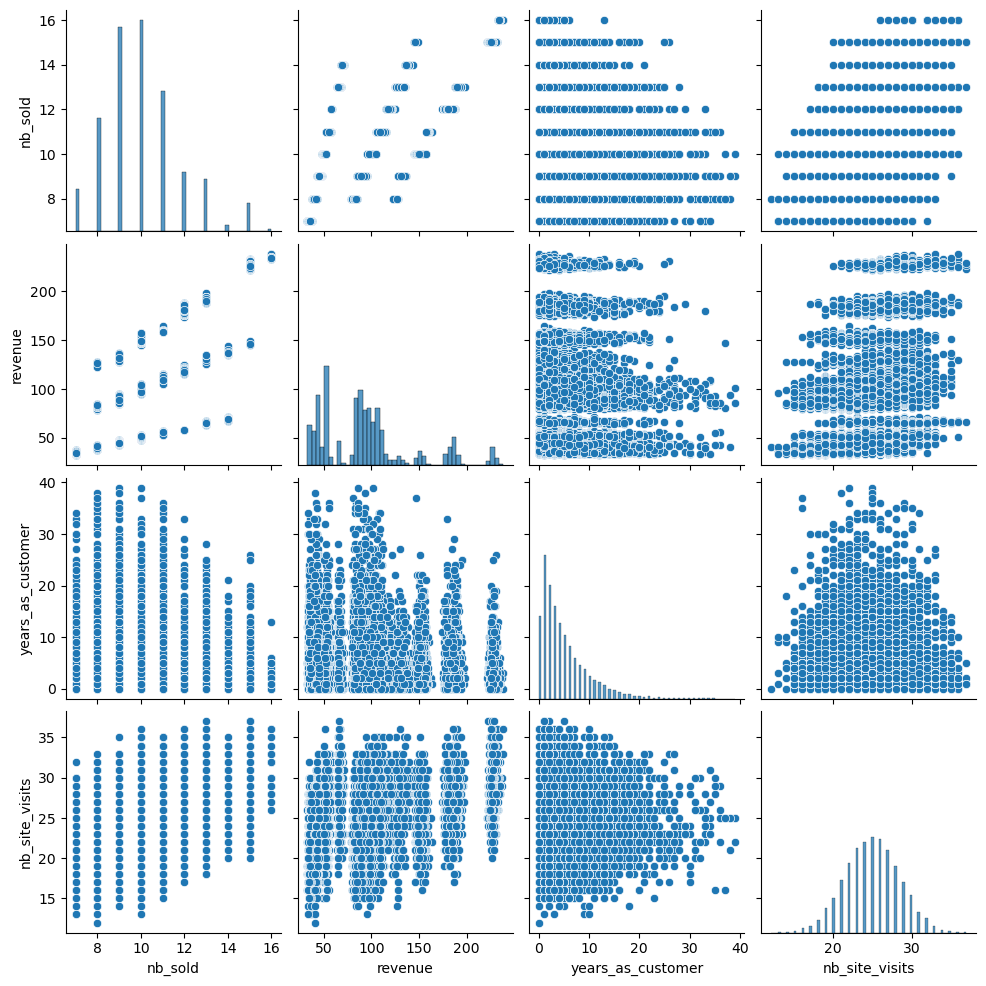

Mean revenue by sales method:
sales_method
Call             47.596866
Email            97.127671
Email + Call    183.651233
Name: revenue, dtype: float64

Number of customers per sales method:
sales_method
Email           7465
Call            4961
Email + Call    2572
Name: count, dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary statistics for all numeric columns
print("Summary statistics for numeric columns:")
print(df.describe())
print()

# 2. Value counts for categorical columns
print("Sales method value counts:")
print(df['sales_method'].value_counts())
print()
print("Top 10 states by count:")
print(df['state'].value_counts().head(10))
print()

# 3. Histograms for all numeric columns
df[['nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']].hist(bins=20, figsize=(10,8))
plt.tight_layout()
plt.show()

# 4. Pairplot for numeric relationships (exclude rows with missing revenue)
print("Pairplot for numeric columns (excluding missing revenue):")
sns.pairplot(df[['nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']].dropna())
plt.show()

# 5. Grouped means and counts
print("Mean revenue by sales method:")
print(df_revenue.groupby('sales_method')['revenue'].mean())
print()
print("Number of customers per sales method:")
print(df['sales_method'].value_counts())

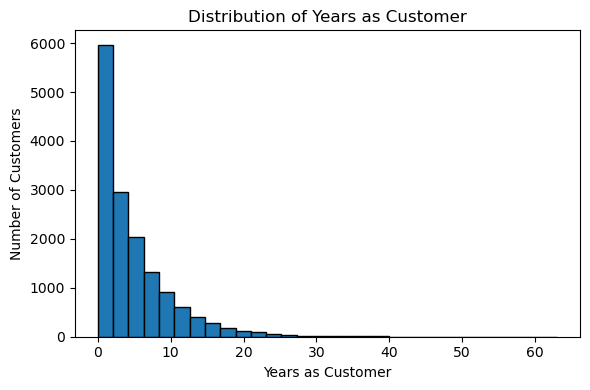

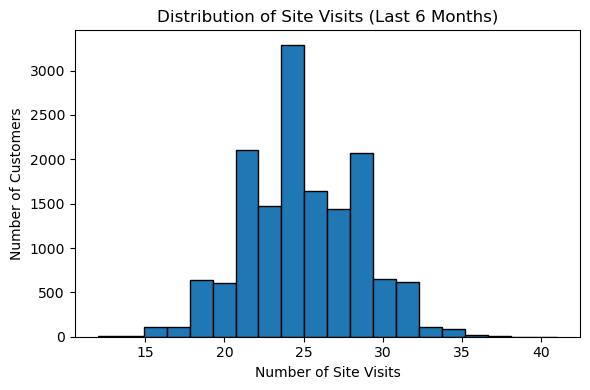

In [19]:
# 1.

import matplotlib.pyplot as plt

# Histogram for years_as_customer
plt.figure(figsize=(6,4))
plt.hist(df['years_as_customer'], bins=30, edgecolor='black')
plt.title('Distribution of Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Histogram for nb_site_visits
plt.figure(figsize=(6,4))
plt.hist(df['nb_site_visits'], bins=20, edgecolor='black')
plt.title('Distribution of Site Visits (Last 6 Months)')
plt.xlabel('Number of Site Visits')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

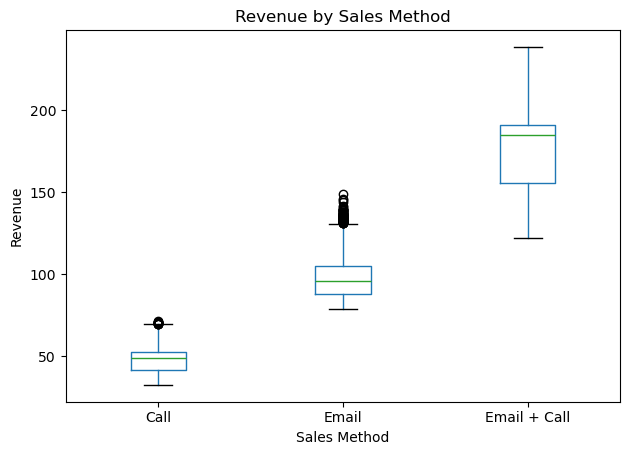

In [18]:
# 2. 

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_revenue.boxplot(column='revenue', by='sales_method', grid=False)
plt.title('Revenue by Sales Method')
plt.suptitle('')  # Removes the automatic title
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

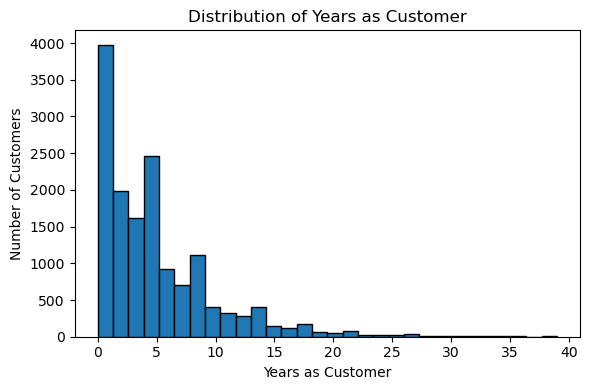

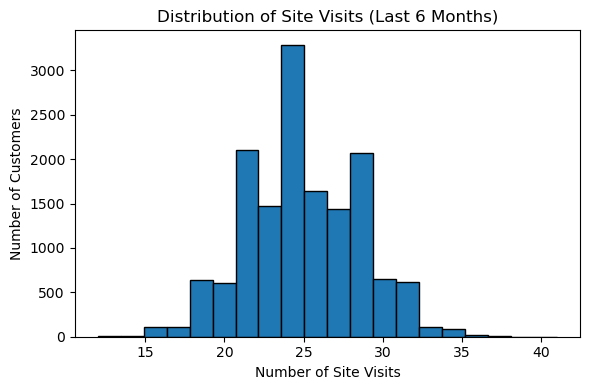

<Figure size 800x500 with 0 Axes>

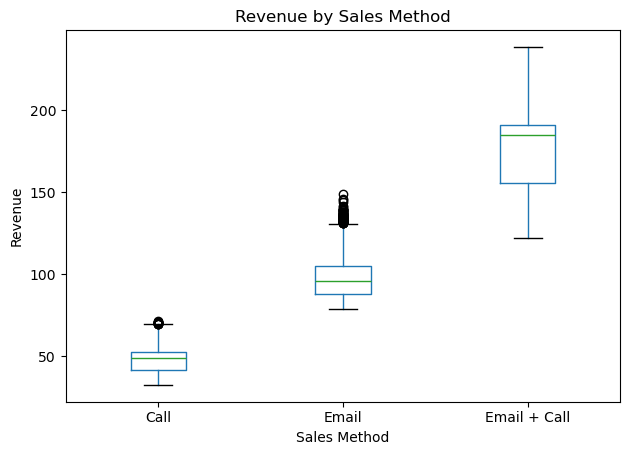

In [9]:
# 3.

import matplotlib.pyplot as plt

# histogram for years_as_customer
plt.figure(figsize=(6,4))
plt.hist(df['years_as_customer'], bins=30, edgecolor='black')
plt.title('Distribution of Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('years_as_customer_hist.png', dpi=150)  # save as png so I can upload to DataCamp
plt.show()

# histogram for nb_site_visits
plt.figure(figsize=(6,4))
plt.hist(df['nb_site_visits'], bins=20, edgecolor='black')
plt.title('Distribution of Site Visits (Last 6 Months)')
plt.xlabel('Number of Site Visits')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('nb_site_visits_hist.png', dpi=150)  # save for the report upload
plt.show()

# boxplot for revenue by sales method
plt.figure(figsize=(8, 5))
df_revenue.boxplot(column='revenue', by='sales_method', grid=False)
plt.title('Revenue by Sales Method')
plt.suptitle('')  # just removes the default subtitle
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig('revenue_by_sales_method_boxplot.png', dpi=150)  # will need this one for the report too
plt.show()


# **Definition of a metric for the business to monitor**

In [11]:
# calculate average revenue per customer for each sales method

avg_revenue_per_method = df.groupby('sales_method')['revenue'].mean().round(2)
print(avg_revenue_per_method)

sales_method
Call             47.60
Email            97.13
Email + Call    183.65
Name: revenue, dtype: float64
